<a href="https://colab.research.google.com/github/u-masao/openai-agents-sdk-samples/blob/main/notebools/GradioChatBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# はじめに

このノートブックでは OpenAI Agent SDK と Gradio を使って Web インタフェースのチャットボットを動かします。

# 背景と目的

AI といえば ChatGPT みたいなチャットインタフェースが有名です。動作、構造、ライブラリの使いやすさ等を確認するため作ってみることにしました。

# 使い方

このノートブックは Google Colaboratory で動作確認しています。

- Google Colab でこのスクリプトを開きます
- 画面の左側の鍵のマークをクリックすると下図のようになります


> 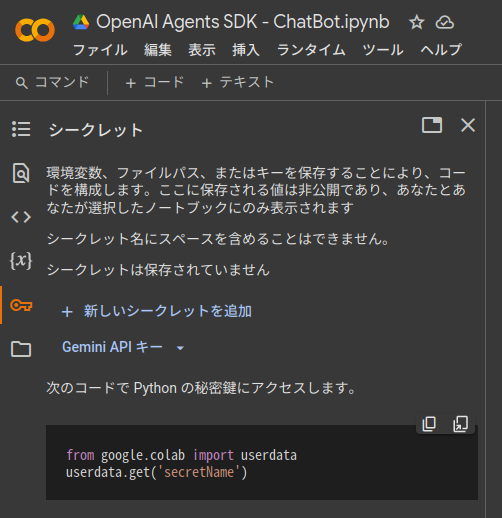


- 「新しいシークレットの追加」をクリックします
- 入力欄に以下を設定します
  - ノートブックからのアクセス: 有効
  - 名前: OPENAI_API_KEY
  - 値: [OpenAI Platform](https://platform.openai.com) で取得した API キー

> 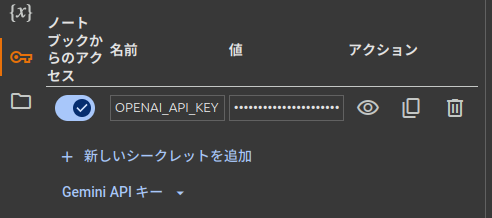

- Ctrl-F9 キーを押してすべてのセルを実行します
- 一番下までスクロールします
- 最初のメッセージを送信して会話を楽しみます

In [11]:
# パッケージをインストール
!pip install -q gradio openai-agents

# Google Colab のシークレットを読み取ります
from google.colab import userdata
import os
os.environ["OPENAI_API_KEY"]=userdata.get('OPENAI_API_KEY')

In [12]:
import json

import gradio as gr
from agents import Agent, Runner

with gr.Blocks() as demo:
    # UI を定義
    chatbot = gr.Chatbot(type="messages")
    with gr.Row():
        msg = gr.Textbox(show_label=False, scale=7)
        with gr.Column(scale=1):
            submit = gr.Button("送信")
            clear = gr.ClearButton([msg, chatbot], value="リセット")

    # エージェントを定義
    agent = Agent(
        name="素っ気ないアシスタント",
        instructions="あなたは素っ気ないアシスタントです。"
        "ユーザーの言葉に対して最小限のテキストで応答して。"
        "ユーザーはJSON形式でメッセージを送りますが、"
        "応答は日本語の文字列にして。",
        model="gpt-4o-mini",
    )

    # Runner.run() を非同期で呼ぶので async def を指定
    async def respond(message, chat_history):
        """メッセージ送信時の処理"""
        # 会話履歴にユーザーの発言を追加
        chat_history.append({"role": "user", "content": message})

        # エージェントに会話履歴を送信
        response = await Runner.run(
            agent, json.dumps(chat_history, ensure_ascii=False)
        )

        # エージェントの出力を取得
        bot_message = response.final_output

        # エージェントの出力を会話履歴に追加
        chat_history.append({"role": "assistant", "content": bot_message})

        # Gradui UI に会話履歴を返す
        return "", chat_history

    # Gradio UI にコールバックを設定
    gr.on(
        triggers=[msg.submit, submit.click],
        fn=respond,
        inputs=[msg, chatbot],
        outputs=[msg, chatbot],
    )

if __name__ == "__main__":
    # gradio を起動
    demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://41bbd45809449ab292.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://41bbd45809449ab292.gradio.live
